## Title: Food Inspections
### Brief Description: 
This dataset contains information from inspections of restaurants and other
food establishments in Chicago from January 1, 2010 to the present.
### Description: 
This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program. Inspections are done using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). A subset of data elements are extracted from this database and downloaded into this data portal. These elements are:
* **DBA:**  
Doing business as.’ This is legal name of the establishment.
* **AKA:**  
‘Also known as.’ This is the name the public would know the establishment as.
* **License number:**  
This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.
* **Type of facility:**  
Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.
* **Risk category of facility:**  
Each establishment is categorized as to its risk of adversely affecting the public’s health, with **1 being the highest** and **3 the lowest**. The frequency of inspection is tied to this risk, **with risk 1 establishments inspected most frequently and risk 3 least frequently.**
* **Street address, city, state and zip code of facility:**  
This is the complete address where the facility is located.
* **Inspection date:**  
This is the date the inspection occurred. A particular establishment is likely to have multiple inspections which are denoted by different inspection dates.
* **Inspection type:**  
An inspection can be one of the following types: **canvass**, the most common type of inspection performed at a frequency relative to the risk of the establishment; **consultation**, when the inspection is done at the request of the owner prior to the opening of the establishment; **complaint**, when the inspection is done in response to a complaint against the establishment; **license**, when the inspection is done as a requirement for the establishment to receive its license to operate; **suspect food poisoning**, when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection); **task-force inspection**, when an inspection of a bar or tavern is done. **Re-inspections can occur for most types of these inspections and are indicated as such**.
* **Results:**  
An inspection can pass, pass with conditions or fail. Establishments receiving a `pass` were found to have no critical or serious violations **(violation number 1-14 and 15- 29, respectively)**. Establishments receiving a `pass with conditions` were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a `fail` were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.
* **Violations**:  
An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued. 

## Disclaimer: 
Attempts have been made to minimize any and all duplicate inspection reports. However, the dataset may still contain such duplicates and the appropriate precautions should be exercised when viewing or analyzing these data. The result of the inspections (pass, pass with conditions or fail) as well as the violations noted are based on the findings identified and reported by the inspector at the time of the inspection, and may not reflect the findings noted at other times.
## Data Owner: 
Chicago Department of Public Health
## Time Period: 
2010 - Present
## Frequency: 
This database will be updated with information from new inspections each Friday.

In [1]:
import json
import math
import unidecode
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Chicago

In [2]:
def read_clean_chicago(path):
    features = ['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', \
            'Risk', 'Address', 'Zip', 'Inspection Date', 'Inspection Type',  \
            'Results', 'Violations', 'Latitude', 'Longitude']
    
    dataset = pd.read_csv(path)[features].drop_duplicates().copy()
    
    def to_lower(x):
        if type(x) == str:
            return x.lower().strip()
        
    def to_int(x):
        if not math.isnan(x):
            return int(x)
        
    dataset['License #'] = dataset['License #'].fillna(-999).astype(int)
    dataset['Zip'] = dataset['Zip'].apply(to_int)
    dataset['AKA Name'][dataset['AKA Name'].isnull()] = dataset['DBA Name'][dataset['AKA Name'].isnull()]
    dataset['Inspection Date'] = dataset['Inspection Date'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
    
    features = ['DBA Name', 'AKA Name', 'Address', 'Violations', 'Facility Type', 'Inspection Type', \
                'Inspection Type']
    for feature in features:
        dataset[feature] = dataset[feature].apply(to_lower)
    
    return dataset.copy()

In [3]:
# Read in chicago food inspection
CHICAGO_PATH = 'data/chicago-food-inspections/food-inspections.csv'
chicago = read_clean_chicago(CHICAGO_PATH)

print(chicago['AKA Name'].nunique())
print(chicago.shape)
chicago.reset_index(drop=True, inplace=True)
chicago.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


26738
(195524, 14)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,2345318,subway,subway,2529116,restaurant,Risk 1 (High),2620 n narragansett ave,60639.0,2019-11-08,canvass re-inspection,Pass w/ Conditions,"3. management, food employee and conditional e...",41.927995,-87.785752
1,2345334,la michoacana ice cream shop,la michoacana ice cream shop,2698396,restaurant,Risk 1 (High),3591-3597 n milwaukee ave,60641.0,2019-11-08,license,Pass w/ Conditions,"3. management, food employee and conditional e...",41.946140,-87.735183
2,2345339,the crepe shop,the crepe shop,2699005,restaurant,Risk 1 (High),2934 n broadway,60657.0,2019-11-08,license,Fail,10. adequate handwashing sinks properly suppli...,41.935930,-87.644407
3,2345321,gopuff,gopuff,2684560,grocery store,Risk 3 (Low),1801 w warner ave,60613.0,2019-11-08,license re-inspection,Pass,None,41.956846,-87.674395
4,2345319,gopuff,gopuff,2684558,grocery store,Risk 3 (Low),1801 w warner ave,60613.0,2019-11-08,license re-inspection,Pass,39. contamination prevented during food prepar...,41.956846,-87.674395


In [4]:
def split_violation(data, ):
    lss = list()
    for x in data.Violations:
        sets = set()
        if type(x) == str:
            y = x.split("| ")
            for z in y:
                sets.add(z.split(". ")[0])
        lss.append(sets)
    return lss
        
split = split_violation(chicago)
        
chicago["violation_number"] = pd.Series( (v for v in split) )

In [5]:
chicago.sort_values("Inspection Date",ascending = False,inplace = True)
chicago.reset_index(drop=True, inplace=True)
chicago

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,violation_number
0,2345318,subway,subway,2529116,restaurant,Risk 1 (High),2620 n narragansett ave,60639.0,2019-11-08,canvass re-inspection,Pass w/ Conditions,"3. management, food employee and conditional e...",41.927995,-87.785752,"{58, 3, 5}"
1,2345321,gopuff,gopuff,2684560,grocery store,Risk 3 (Low),1801 w warner ave,60613.0,2019-11-08,license re-inspection,Pass,None,41.956846,-87.674395,{}
2,2345319,gopuff,gopuff,2684558,grocery store,Risk 3 (Low),1801 w warner ave,60613.0,2019-11-08,license re-inspection,Pass,39. contamination prevented during food prepar...,41.956846,-87.674395,"{39, 51}"
3,2345334,la michoacana ice cream shop,la michoacana ice cream shop,2698396,restaurant,Risk 1 (High),3591-3597 n milwaukee ave,60641.0,2019-11-08,license,Pass w/ Conditions,"3. management, food employee and conditional e...",41.946140,-87.735183,"{3, 5, 51, 57}"
4,2345339,the crepe shop,the crepe shop,2699005,restaurant,Risk 1 (High),2934 n broadway,60657.0,2019-11-08,license,Fail,10. adequate handwashing sinks properly suppli...,41.935930,-87.644407,"{55, 51, 48, 10, 53, 39}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195519,67757,dunkin donuts/baskin-robbins,dunkin donuts/baskin-robbins,1380279,restaurant,Risk 2 (Medium),100 w randolph st,60601.0,2010-01-04,tag removal,Pass,None,41.884586,-87.631010,{}
195520,67738,michael's on main cafe,michael's on main cafe,2008948,restaurant,Risk 1 (High),8750 w bryn wawr ave,60631.0,2010-01-04,license,Fail,18. no evidence of rodent or insect outer open...,NaN,NaN,"{32, 18, 34, 36, 35}"
195521,52234,cafe 608,cafe 608,2013328,restaurant,Risk 1 (High),608 w barry ave,60657.0,2010-01-04,license re-inspection,Pass,None,41.938007,-87.644755,{}
195522,67733,wolcott's,troquet,1992040,restaurant,Risk 1 (High),1834 w montrose ave,60613.0,2010-01-04,license re-inspection,Pass,None,41.961606,-87.675967,{}


In [6]:
from scipy.sparse import csr_matrix
import numpy as np

max_size = 100
times = np.zeros(max_size)
Not_corrected = np.zeros(max_size)
sum_1 = np.zeros(max_size)
sum_2 = np.zeros(max_size)

chicago_loced = chicago.loc[:, "violation_number"]
chicago_grouped = chicago_loced.groupby(chicago['License #'])
for name,group in chicago_grouped:
    mat = None

    if name == -999:
        continue
    if name == 0:
        continue
        
#     if name >= 500:
#         break
#     print (name)
#     print (group)
    for i in list(group):
        col = np.array(list(i))
#         if (col.size > 0):
#             if (max(col) == "70"):
#                 print(name)
        size = col.size
        row = np.zeros(size)
        data = np.ones(size)
        a = csr_matrix((data, (row, col)), shape=(1, max_size)).toarray()
        if mat is None:
            mat = a
        else:
            mat = np.vstack((a, mat))
    if mat.shape[0] > 1:
        mat_1 = np.delete(mat, mat.shape[0]-1, axis = 0)
        mat_2 = np.delete(mat, 0, axis = 0)
        mat_3 = np.logical_and(mat_1, mat_2)
        sum_1 = np.sum(mat_1,axis=0)
        sum_2 = np.sum(mat_3,axis=0)
    times = times + sum_1
    Not_corrected = Not_corrected + sum_2
    sum_1 = np.zeros(max_size)
    sum_2 = np.zeros(max_size)
#     print(mat[0])
#     print(mat_1[0])
#     print(mat_2[0])
#     print(mat_3[0])
#     print(sum_1)
#     print(sum_2)
#     print(sum_2/sum_1)
# print(times)
# print(Not_corrected)

In [7]:
print(Not_corrected/times)
# print(chicago.loc[129287, :]["Violations"])
# print(chicago.loc[184990, :]["Violations"])

[       nan 0.06621227 0.0800964  0.23551585 0.03508772 0.51264815
 0.02624531 0.03448276 0.04928282 0.06005831 0.26771897 0.06040079
 0.03136594 0.3088685  0.11267606 0.04761905 0.08019967 0.00757576
 0.07807002 0.06102176 0.0546875  0.16722516 0.04635762 0.42615012
 0.08390733 0.48213166 0.06572438 0.0610687  0.0303458  0.10250606
 0.27175832 0.22177503 0.44249338 0.48439146 0.50912436 0.48533399
 0.3336273  0.26389937 0.41565846 0.27690371 0.22664697 0.35055111
 0.17873627 0.22782064 0.29103609 0.26702674 0.38       0.50937845
 0.19170984 0.48410463 0.08547009 0.48373187 0.20253165 0.43646409
 0.14308426 0.61060365 0.47641073 0.5154185  0.47839954 0.12062257
 0.15485075 0.04968944 0.03225806 0.                nan        nan
        nan        nan        nan        nan 0.0510397         nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


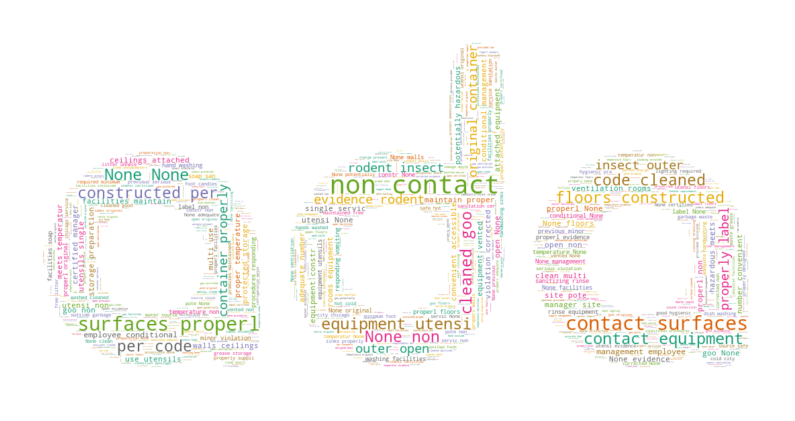

<Figure size 720x432 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = chicago.iloc[:, 11].to_string()
stopwords = set(STOPWORDS)
stopwords.add('food')
mask_image = np.array(Image.open("ada.png"))
mask_image[mask_image > 250] = 255

word_cloud = WordCloud(colormap = "Dark2", background_color='white', 
                       mask = mask_image, stopwords=stopwords, 
                       width = 1165, height = 607,  max_words=1000, min_font_size = 1, relative_scaling = 0.2).generate(data)
plt.figure(figsize = (14,20))
plt.imshow(word_cloud, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.figure(figsize = (10,6))
plt.show()
word_cloud.to_file("word_cloud.png")

In [11]:
chicago[chicago['Violations'].isnull()]['Results'].value_counts()

Pass                    23846
Out of Business         16795
No Entry                 5789
Fail                     3096
Not Ready                1825
Pass w/ Conditions        451
Business Not Located       68
Name: Results, dtype: int64

In [12]:
chicago['Facility Type'].value_counts()[:100]

restaurant                           130326
grocery store                         24908
school                                12107
children's services facility           3071
bakery                                 2862
daycare (2 - 6 years)                  2688
daycare above and under 2 years        2366
long term care                         1346
catering                               1191
mobile food dispenser                   869
liquor                                  855
daycare combo 1586                      751
mobile food preparer                    631
golden diner                            565
hospital                                548
wholesale                               535
tavern                                  320
daycare (under 2 years)                 249
special event                           218
shared kitchen user (long term)         199
banquet hall                            167
gas station                             140
mobile prepared food vendor     

**Deleted columns: **

 'Census Tracts',
 'City',
 'Community Areas',
 'Historical Wards 2003-2015',
 'State',
 'Wards',
 'Zip Codes'
 'Location'

## Yelp data

In [3]:
# # Read in scraped data from yelp
# file_list = ['1-1', '1-2', '3-1', '3-2', '3-3', '4']
# df_list = []

# for file in file_list:
#     yelp_default = read_clean('yelp_by_region/{0}.csv'.format(file)) 
#     df_list.append(yelp_default)

# yelp_default = read_clean('yelp_by_region/{0}.csv'.format('2'))
# yelp_default.drop(['Unnamed: 0'], axis = 1, inplace = True)
# df_list.append(yelp_default)


# combined = pd.concat(df_list, ignore_index=True).drop_duplicates().reset_index(drop=True)
# combined['business_name'] = combined['business_name'].replace({'&amp;' : '&'}, regex = True)
# combined['business_name'] = combined['business_name'].replace({'‘' : '\''}, regex = True)
# combined['business_name'] = combined['business_name'].replace({'’' : '\''}, regex = True)
# combined['categories'] = combined['categories'].replace({'&amp;' : '&'}, regex = True)
# # combined['business_name'] = combined['business_name'].str.replace(r'[^\x00-\x7F]+', '')
# combined['business_name'] = combined['business_name'].apply(lambda x: unidecode.unidecode(x))
# combined.to_csv('yelp.csv')
combined = pd.read_csv('yelp.csv')
yelp = combined.drop(columns=['Unnamed: 0', 'rank'])
yelp.head()

,business_name,review_count,categories,rating,address,price_range,url
0,kuma's corner - belmont,5000,"Pubs,Burgers",4.0,2900 w belmont ave avondale,$$,https://www.yelp.com/biz/kumas-corner-belmont-...
1,hopleaf,2077,Gastro Pubs,4.0,5148 n clark st andersonville,$$,https://www.yelp.com/biz/hopleaf-chicago?osq=R...
2,honey butter fried chicken,1874,"Chicken Shop,Takeaway & Fast Food,Breakfast & ...",4.0,3361 n elston ave avondale,$$,https://www.yelp.com/biz/honey-butter-fried-ch...
3,m.henry,1692,"Breakfast & Brunch,American (New),Cafes",4.0,5707 n clark st andersonville,$$,https://www.yelp.com/biz/m-henry-chicago?osq=R...
4,big jones,1479,"Southern,Breakfast & Brunch,Bars",4.0,5347 n clark st andersonville,$$,https://www.yelp.com/biz/big-jones-chicago?osq...


In [4]:
yelp.shape


(7675, 7)

## Join Chicago and Yelp by address, name (contains)

In [5]:
# join by address
# Join by he first four digits in an address only
chicago['A_code'] = chicago['Address'].apply(lambda x: x.split(" ")[0])
yelp['a_code'] = yelp['address'].apply(lambda x: x.split(" ")[0])
join_by_address = chicago.merge(yelp, left_on = 'A_code', right_on = 'a_code')
join_by_address.head()
print(join_by_address.shape)

(792737, 31)


In [6]:
# filter by name: aka name contains business name, or business name contains aka name
sim_join_name = join_by_address[join_by_address.apply(lambda x: x['AKA Name'] in x['business_name'] or \
                                                 x['business_name'] in x['AKA Name'], axis = 1)]

def simlarity_join(row):
    A = row['Address'].split(' ')[1]
    a = row['address'].split(' ')[1]
    if len(A) == 1 and len(a) == 1:
        return a == A
    else:
        return True
    
sim_join = sim_join_name[sim_join_name.apply(lambda x: simlarity_join(x), axis = 1)]
sim_join.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,A_code,business_name,review_count,categories,rating,address,price_range,url,a_code
27,2315329,"mother cluckers, llc",mother cluckers,2363325.0,Restaurant,Risk 1 (High),5200 n elston ave,CHICAGO,IL,60630.0,2019-10-03T00:00:00.000,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.975258,-87.751991,"{'longitude': '41.97525809526954', 'latitude':...",NaN,NaN,NaN,NaN,NaN,5200,mother cluckers kitchen,721,"Southern,American (Traditional)",4.5,5200 n elston ave sauganash,$$,https://www.yelp.com/biz/mother-cluckers-kitch...,5200
30,2300495,xocome antojeria,xocome antojeria,2589366.0,Restaurant,Risk 1 (High),5200 s archer ave,CHICAGO,IL,60632.0,2019-07-01T00:00:00.000,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.800108,-87.734468,"{'longitude': '41.80010753541636', 'latitude':...",NaN,NaN,NaN,NaN,NaN,5200,xocome antojeria,29,Mexican,4.0,5200 s archer ave archer heights,NaN,https://www.yelp.com/biz/xocome-antojeria-chic...,5200
54,2159284,xocome antojeria,xocome antojeria,2589366.0,Restaurant,Risk 1 (High),5200 s archer ave,CHICAGO,IL,60632.0,2018-04-02T00:00:00.000,License,Pass,37. TOILET ROOM DOORS SELF CLOSING: DRESSING R...,41.800108,-87.734468,"{'longitude': '41.80010753541636', 'latitude':...",NaN,NaN,NaN,NaN,NaN,5200,xocome antojeria,29,Mexican,4.0,5200 s archer ave archer heights,NaN,https://www.yelp.com/biz/xocome-antojeria-chic...,5200
63,2151007,"mother cluckers, llc",mother cluckers,2363325.0,Restaurant,Risk 1 (High),5200 n elston ave,CHICAGO,IL,60630.0,2018-03-26T00:00:00.000,Complaint Re-Inspection,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.975258,-87.751991,"{'longitude': '41.97525809526954', 'latitude':...",NaN,NaN,NaN,NaN,NaN,5200,mother cluckers kitchen,721,"Southern,American (Traditional)",4.5,5200 n elston ave sauganash,$$,https://www.yelp.com/biz/mother-cluckers-kitch...,5200
69,2150543,"mother cluckers, llc",mother cluckers,2363325.0,Restaurant,Risk 1 (High),5200 n elston ave,CHICAGO,IL,60630.0,2018-03-16T00:00:00.000,Complaint,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.975258,-87.751991,"{'longitude': '41.97525809526954', 'latitude':...",NaN,NaN,NaN,NaN,NaN,5200,mother cluckers kitchen,721,"Southern,American (Traditional)",4.5,5200 n elston ave sauganash,$$,https://www.yelp.com/biz/mother-cluckers-kitch...,5200


In [7]:
print('shape: ', sim_join.shape)
print("According license: ", sim_join['License #'].nunique())
print("According to resturant address: ", sim_join.address.nunique())
print("According to business name: ", sim_join["business_name"].nunique())

shape:  (45684, 31)
According license:  5137
According to resturant address:  3276
According to business name:  2747


In [8]:
# compare 3583 and 3276 means have the different resturants in the same address
# compare license 5137 and 3583(business_name, address] means have the same resturant but different license? why?
print(sim_join[['business_name', 'address']].drop_duplicates())

                       business_name                            address
27           mother cluckers kitchen        5200 n elston ave sauganash
30                  xocome antojeria   5200 s archer ave archer heights
535     brickyard super china buffet  2650 n narragansett ave montclare
548               buffalo wild wings  2650 n narragansett ave montclare
708               subway restaurants  2620 n narragansett ave montclare
...                              ...                                ...
792678           renaldi's pizza pub        2827 n broadway st lakeview
792694                     pauline's  1754 w balmoral ave andersonville
792702            uncle's restaurant     6263 n mccormick rd north park
792703           garcia's restaurant      4760 n lincoln ave ravenswood
792706                     lula cafe    2537 n kedzie blvd logan square

[3583 rows x 2 columns]


In [9]:
sim_join[['AKA Name', 'Address', 'business_name', 'address']].drop_duplicates().head(500)
# spot some mistakes during merge 43860

,AKA Name,Address,business_name,address
27,mother cluckers,5200 n elston ave,mother cluckers kitchen,5200 n elston ave sauganash
30,xocome antojeria,5200 s archer ave,xocome antojeria,5200 s archer ave archer heights
535,super china buffet,2650 n narragansett ave,brickyard super china buffet,2650 n narragansett ave montclare
548,buffalo wild wings,2650 n narragansett ave,buffalo wild wings,2650 n narragansett ave montclare
708,subway,2620 n narragansett ave,subway restaurants,2620 n narragansett ave montclare
711,papa john's pizza,2620 n narragansett ave,papa john's pizza,2620 n narragansett ave montclare
940,rojo gusano,3830 w lawrence ave,rojo gusano,3830 w lawrence ave albany park
969,victor's pizzeria,5418 w north ave,victor's pizzeria & restaurant,5418 w north ave austin
996,j & j fish,6659 s damen ave,j & j fish,6659 s damen ave west englewood
1000,mini hut inc,6659 w archer ave,mini hut,6659 w archer ave garfield ridge


In [10]:
sim_join[sim_join['Facility Type'] == 'Restaurant']['License #'].nunique()

4807

Jimmy John's : fast food chain. multiple sites but with the same address number. 
Subway

## Backup

In [11]:
# Baseline method
joined = chicago.merge(combined, left_on = 'AKA Name', right_on = 'business_name')
len(joined.business_name)

364815

In [12]:
# join by the first four digits in an address and the business name
join_type_1 = joined.copy()
join_type_1['A_code_first'] = joined['Address'].apply(lambda x: x.split(" ")[0])
join_type_1['a_code_first'] = joined['address'].apply(lambda x: x.split(" ")[0])
join_type_1 = join_type_1[ (join_type_1['A_code_first'] == join_type_1['a_code_first'])].copy()
join_type_1.drop(['A_code_first', 'a_code_first'], axis=1, inplace=True)
join_type_1.head()
print("shape", join_type_1.shape)
print("According license: ", join_type_1['License #'].nunique())
print("According to resturant address: ", join_type_1.Address.nunique())
print("According to resturant name: ", join_type_1["DBA Name"].nunique())

shape (26674, 32)
According license:  3071
According to resturant address:  2058
According to resturant name:  1970


**Finding: A single address can respond to **

A single address can correspond to a lot of buinesses. One single AKA name on one single address can have different license number. For example, establishment 'loop soup' at address '131 n clinton st'. 

In [13]:
join_type_1.groupby('Address').count().sort_values(by = 'Inspection ID', ascending = False).head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,A_code,Unnamed: 0,rank,business_name,review_count,categories,rating,address,price_range,url
Address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
131 n clinton st,238,238,238,238,238,238,238,238,238,238,238,238,190,238,238,238,0,0,0,0,0,238,238,238,238,238,238,238,238,214,238
500 w madison st,166,166,166,166,164,166,166,166,166,166,166,166,148,166,166,166,0,0,0,0,0,166,166,166,166,166,166,166,166,158,166
5700 s cicero ave,113,113,113,113,113,113,113,113,113,113,113,113,85,113,113,113,0,0,0,0,0,113,113,113,113,113,113,113,113,86,113
200 e randolph st,113,113,113,113,113,113,113,113,113,113,113,113,96,113,113,113,0,0,0,0,0,113,113,113,113,113,113,113,113,100,113
769 w jackson blvd,108,108,108,108,108,108,108,108,108,108,108,108,90,108,108,108,0,0,0,0,0,108,108,108,108,108,108,108,108,108,108


In [14]:
join_type_1[ join_type_1['Address'] == '131 n clinton st' ]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,A_code,Unnamed: 0,rank,business_name,review_count,categories,rating,address,price_range,url
263044,2312626,cheesus,cheesus,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2019-09-18T00:00:00.000,Canvass,Pass,NaN,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,3416,564,cheesus,0,"Salad,Sandwiches",0.0,131 n clinton st west loop,NaN,https://www.yelp.com/biz/cheesus-chicago-2?osq...
263045,2312626,cheesus,cheesus,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2019-09-18T00:00:00.000,Canvass,Pass,NaN,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,5662,656,cheesus,0,"Salad,Sandwiches",0.0,131 n clinton st west loop,NaN,https://www.yelp.com/biz/cheesus-chicago-2?osq...
263069,2312493,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2019-09-18T00:00:00.000,Canvass,Out of Business,NaN,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,3247,395,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263070,2312493,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2019-09-18T00:00:00.000,Canvass,Out of Business,NaN,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,5392,386,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263071,2268853,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2019-03-05T00:00:00.000,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,3247,395,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263072,2268853,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2019-03-05T00:00:00.000,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,5392,386,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263073,2166974,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2018-05-01T00:00:00.000,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,3247,395,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263074,2166974,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2018-05-01T00:00:00.000,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,5392,386,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263075,2166937,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2018-04-30T00:00:00.000,License,Not Ready,NaN,41.884188,-87.64112,"{'longitude': '41.884187507127805', 'latitude'...",NaN,NaN,NaN,NaN,NaN,131,3247,395,loop soup,28,"Soup,Sandwiches",4.0,131 n clinton st west loop,$,https://www.yelp.com/biz/loop-soup-chicago-2?o...
263076,2166937,loop soup,loop soup,2594741.0,Restaurant,Risk 1 (High),131 n clinton st,CHICAGO,IL,60661.0,2018-04-30T00:00:00.000,License,Not 

In [15]:
# join by the list of numbers appeared in an address and the business name
import re
join_type_2 = joined.copy()
join_type_2['A_code'] = joined['Address'].apply(lambda x: tuple(re.findall("\d+", x)) )
join_type_2['a_code'] = joined['address'].apply(lambda x: tuple(re.findall("\d+", x)) )
join_type_2 = join_type_2[(join_type_2['A_code'] == join_type_2['a_code'])]#.drop_duplicates() \
       #[['AKA Name', 'Address', 'business_name', 'address']]
join_type_2.drop(['A_code', 'a_code'], axis=1, inplace=True)
join_type_2.head()
print(join_type_2.shape)
# inspection ID, date, type, result, comment, 

(26509, 31)
